In [6]:
import pickle
import boris_extraction as boris
import multirecording_spikeanalysis as spike
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import sem
from itertools import combinations
def hex_2_rgb(hex_color): # Orange color
    rgb_color = tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (1, 3, 5))
    return rgb_color

# Phase3:

## Collection Creation

In [7]:
phase3_collection = spike.EphysRecordingCollection("D:\\social_ephys_pilot2_cum\\proc\\Phase 3")


20230809_103121_1_merged.rec
20230809_143303_1_merged.rec
20230810_101534_1_merged.rec
20230810_120856_1_merged.rec
20230810_140909_1_merged.rec
20230811_101635_1_merged.rec
Unit 74 is unsorted & has 7 spikes
Unit 74 will be deleted
20230811_120331_merged.rec
20230811_154219_1_merged.rec
Please assign event dictionaries to each recording
as recording.event_dict
event_dict = {event name(str): np.array[[start(ms), stop(ms)]...]
Please assign subjects to each recording as recording.subject


In [8]:
p3d1_1_1 = phase3_collection.get_by_name('20230809_103121_1_merged.rec')
#p3d1_1_2 was only half as long so we will not do ephys data analysis on it 
p3d1_1_4 = phase3_collection.get_by_name('20230809_143303_1_merged.rec')

p3d2_1_1 = phase3_collection.get_by_name('20230810_101534_1_merged.rec')
p3d2_1_2 = phase3_collection.get_by_name('20230810_120856_1_merged.rec')
p3d2_1_4 = phase3_collection.get_by_name('20230810_140909_1_merged.rec')

p3d3_1_1 = phase3_collection.get_by_name('20230811_101635_1_merged.rec')
p3d3_1_2 = phase3_collection.get_by_name('20230811_120331_merged.rec')
p3d3_1_4 = phase3_collection.get_by_name('20230811_154219_1_merged.rec')


p3d1_1_1.subject = '1.1'
p3d1_1_4.subject = '1.4'
p3d2_1_1.subject = '1.1'
p3d2_1_2.subject = '1.2'
p3d2_1_4.subject = '1.4'
p3d3_1_1.subject = '1.1'
p3d3_1_2.subject = '1.2'
p3d3_1_4.subject = '1.4'

min_iti = 2

## Boris Upload

In [9]:
#Day 1
#Subject 1.1 
p3d1_1_1_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230809_103121_1_merged.rec\\20230809_103121_1.1_1t1bL_p3d1.xlsx")
p3d1_1_1_df = p3d1_1_1_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]

#Subject 1.2 - FOR BEHAVIORAL ANAYLSIS ONLY 
p3d1_1_2_1_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\fucked\\20230809_120416_1_merged.rec\\20230809 120416 1.1.xlsx")
p3d1_1_2_2_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\fucked\\20230809_120416_1_merged.rec\\20230809 120416 1.2.xlsx")

p3d1_1_2_1_df = p3d1_1_2_1_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]

#Subject 1.4
p3d1_1_4_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230809_143303_1_merged.rec\\20230809_143303_1.4_3t3bL_p3d1.xlsx")
p3d1_1_4_df = p3d1_1_4_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]

#Day 2

#Subject 1.1
p3d2_1_1_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230810_101534_1_merged.rec\\20230810_101534_1.1_p3d2.xlsx")
p3d2_1_1_df = p3d2_1_1_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]

#Subject 1.2
p3d2_1_2_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230810_120856_1_merged.rec\\20230810_120856_1.2_p3d2.xlsx")
p3d2_1_2_df = p3d2_1_2_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]

#Subject 1.4
p3d2_1_4_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230810_140909_1_merged.rec\\20230810_140909_1.4_p3d2.xlsx")
p3d2_1_4_df = p3d2_1_4_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]

#Day 3

#Subject 1.1
p3d3_1_1_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230811_101635_1_merged.rec\\1.1_p3d3.xlsx")
p3d3_1_1_df = p3d3_1_1_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]

#Subject 1.2 - has two excels, camera crashed
p3d3_1_2_df1 = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230811_120331_merged.rec\\20230811_120331_1.2_p3d3_1.xlsx")
p3d3_1_2_df1 = p3d3_1_2_df1[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]

p3d3_1_2_df2 = pd.read_excel("D:\\social_ephys_pilot2_cum\proc\Phase 3\\20230811_120331_merged.rec\\20230811_120331_1.2_p3d3_2.xlsx")
p3d3_1_2_df2 = p3d3_1_2_df2[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]

#Subject 1.4
p3d3_1_4_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230811_154219_1_merged.rec\\20230811_154219_1.4_3t3bL_p3d3.xlsx")
p3d3_1_4_df = p3d3_1_4_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]

## Array creation

### Day 1

In [10]:
# Subject 1.1
last10min_p3d1_1_1_df = p3d1_1_1_df[p3d1_1_1_df['Start (s)'] > 1939]
first10min_p3d1_1_1_df = p3d1_1_1_df[p3d1_1_1_df['Start (s)'] < 601]
familiarization_p3d1_1_1_df = p3d1_1_1_df[(p3d1_1_1_df['Start (s)'] < 1258) & (p3d1_1_1_df['Start (s)'] > 675)]
ITI_p3d1_1_1_df = p3d1_1_1_df[(p3d1_1_1_df['Start (s)'] > 1271) & (p3d1_1_1_df['Start (s)'] < 1860)]

novel_p3d1_1_1_array = boris.get_behavior_bouts(last10min_p3d1_1_1_df, [1.1], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)
fam_p3d1_1_1_array = boris.get_behavior_bouts(last10min_p3d1_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
cagemate_p3d1_1_1_array = boris.get_behavior_bouts(last10min_p3d1_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
empty_p3d1_1_1_array = boris.get_behavior_bouts(last10min_p3d1_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)

#cup3_p3d1_1_1_array = boris.get_behavior_bouts(first10min_p3d1_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
#cup4_p3d1_1_1_array = boris.get_behavior_bouts(first10min_p3d1_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
cup1_p3d1_1_1_array = boris.get_behavior_bouts(first10min_p3d1_1_1_df, [1.1], ['sniff cup 1', 'chew cup 1', 'sniff cup 2', 'chew cup 2','sniff cup 3', 'chew cup 3','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
#cup2_p3d1_1_1_array = boris.get_behavior_bouts(first10min_p3d1_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

famempty_p3d1_1_1_array = boris.get_behavior_bouts(familiarization_p3d1_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3','sniff cup 1', 'chew cup 1','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
famfam_p3d1_1_1_array = boris.get_behavior_bouts(familiarization_p3d1_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

ITIcup3_p3d1_1_1_array = boris.get_behavior_bouts(ITI_p3d1_1_1_df, [1.1],['sniff cup 3', 'chew cup 3','sniff cup 1', 'chew cup 1','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
ITIfamcup_p3d1_1_1_array = boris.get_behavior_bouts(ITI_p3d1_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

#Subject 1.4
last10min_p3d1_1_4_df = p3d1_1_4_df[p3d1_1_4_df['Start (s)'] > 1920]
first10min_p3d1_1_4_df = p3d1_1_4_df[p3d1_1_4_df['Start (s)'] < 602]
familiarization_p3d1_1_4_df = p3d1_1_4_df[(p3d1_1_4_df['Start (s)'] < 1234) & (p3d1_1_4_df['Start (s)'] > 629)]
ITI_p3d1_1_4_df = p3d1_1_4_df[(p3d1_1_4_df['Start (s)'] > 1260) & (p3d1_1_4_df['Start (s)'] < 1856)]
novel_p3d1_1_4_array = boris.get_behavior_bouts(last10min_p3d1_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
fam_p3d1_1_4_array = boris.get_behavior_bouts(last10min_p3d1_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
cagemate_p3d1_1_4_array = boris.get_behavior_bouts(last10min_p3d1_1_4_df, [1.4], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)
empty_p3d1_1_4_array = boris.get_behavior_bouts(last10min_p3d1_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
#cup3_p3d1_1_4_array = boris.get_behavior_bouts(first10min_p3d1_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
#cup4_p3d1_1_4_array = boris.get_behavior_bouts(first10min_p3d1_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
cup1_p3d1_1_4_array = boris.get_behavior_bouts(first10min_p3d1_1_4_df, [1.4], ['sniff cup 1', 'chew cup 1', 'sniff cup 2', 'chew cup 2','sniff cup 3', 'chew cup 3','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
#cup2_p3d1_1_4_array = boris.get_behavior_bouts(first10min_p3d1_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
famcup3_p3d1_1_4_array = boris.get_behavior_bouts(familiarization_p3d1_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3','sniff cup 1', 'chew cup 1','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
famfam_p3d1_1_4_array = boris.get_behavior_bouts(familiarization_p3d1_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
ITIcup3_p3d1_1_4_array = boris.get_behavior_bouts(ITI_p3d1_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3','sniff cup 1', 'chew cup 1','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
ITIfamcup_p3d1_1_4_array = boris.get_behavior_bouts(ITI_p3d1_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

### Day 2

In [11]:
#Subject 1.1
last10min_p3d2_1_1_df = p3d2_1_1_df[p3d2_1_1_df['Start (s)'] > 1926]
first10min_p3d2_1_1_df = p3d2_1_1_df[p3d2_1_1_df['Start (s)'] < 600]
familiarization_p3d2_1_1_df = p3d2_1_1_df[(p3d2_1_1_df['Start (s)'] < 1216) & (p3d2_1_1_df['Start (s)'] > 612)]
ITI_p3d2_1_1_df = p3d2_1_1_df[(p3d2_1_1_df['Start (s)'] > 1222) & (p3d2_1_1_df['Start (s)'] < 1821)]

novel_p3d2_1_1_array = boris.get_behavior_bouts(last10min_p3d2_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
fam_p3d2_1_1_array = boris.get_behavior_bouts(last10min_p3d2_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
cagemate_p3d2_1_1_array = boris.get_behavior_bouts(last10min_p3d2_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
empty_p3d2_1_1_array = boris.get_behavior_bouts(last10min_p3d2_1_1_df, [1.1], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)

#cup3_p3d2_1_1_array = boris.get_behavior_bouts(first10min_p3d2_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
#cup4_p3d2_1_1_array = boris.get_behavior_bouts(first10min_p3d2_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
cup1_p3d2_1_1_array = boris.get_behavior_bouts(first10min_p3d2_1_1_df, [1.1], ['sniff cup 1', 'chew cup 1', 'sniff cup 2', 'chew cup 2','sniff cup 3', 'chew cup 3','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
#cup2_p3d2_1_1_array = boris.get_behavior_bouts(first10min_p3d2_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

famcup3_p3d2_1_1_array = boris.get_behavior_bouts(familiarization_p3d2_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
famfam_p3d2_1_1_array = boris.get_behavior_bouts(familiarization_p3d2_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)

ITIcup3_p3d2_1_1_array = boris.get_behavior_bouts(ITI_p3d2_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
ITIfamcup_p3d2_1_1_array = boris.get_behavior_bouts(ITI_p3d2_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)

#Subject 1.2
last10min_p3d2_1_2_df = p3d2_1_2_df[p3d2_1_2_df['Start (s)'] > 2049]
first10min_p3d2_1_2_df = p3d2_1_2_df[p3d2_1_2_df['Start (s)'] < 723]
familiarization_p3d2_1_2_df = p3d2_1_2_df[(p3d2_1_2_df['Start (s)'] < 1351) & (p3d2_1_2_df['Start (s)'] > 734)]
ITI_p3d2_1_2_df = p3d2_1_2_df[(p3d2_1_2_df['Start (s)'] > 1373) & (p3d2_1_2_df['Start (s)'] < 1950)]

novel_p3d2_1_2_array = boris.get_behavior_bouts(last10min_p3d2_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
fam_p3d2_1_2_array = boris.get_behavior_bouts(last10min_p3d2_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
cagemate_p3d2_1_2_array = boris.get_behavior_bouts(last10min_p3d2_1_2_df, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)
empty_p3d2_1_2_array = boris.get_behavior_bouts(last10min_p3d2_1_2_df, [1.2], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

#cup3_p3d2_1_2_array = boris.get_behavior_bouts(first10min_p3d2_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
#cup4_p3d2_1_2_array = boris.get_behavior_bouts(first10min_p3d2_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
cup1_p3d2_1_2_array = boris.get_behavior_bouts(first10min_p3d2_1_2_df, [1.2], ['sniff cup 1', 'chew cup 1', 'sniff cup 2', 'chew cup 2','sniff cup 3', 'chew cup 3','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
#cup2_p3d2_1_2_array = boris.get_behavior_bouts(first10min_p3d2_1_2_df, [1.2], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

famcup3_p3d2_1_2_array = boris.get_behavior_bouts(familiarization_p3d2_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
famfam_p3d2_1_2_array = boris.get_behavior_bouts(familiarization_p3d2_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)

ITIcup3_p3d2_1_2_array = boris.get_behavior_bouts(ITI_p3d2_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
ITIfamcup_p3d2_1_2_array = boris.get_behavior_bouts(ITI_p3d2_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)

#Subject 1.4
last10min_p3d2_1_4_df = p3d2_1_4_df[p3d2_1_4_df['Start (s)'] > 1912]
first10min_p3d2_1_4_df = p3d2_1_4_df[p3d2_1_4_df['Start (s)'] < 621]
familiarization_p3d2_1_4_df = p3d2_1_4_df[(p3d2_1_4_df['Start (s)'] < 1221) & (p3d2_1_4_df['Start (s)'] > 635)]
ITI_p3d2_1_4_df = p3d2_1_4_df[(p3d2_1_4_df['Start (s)'] > 1234) & (p3d2_1_4_df['Start (s)'] < 1836)]

novel_p3d2_1_4_array = boris.get_behavior_bouts(last10min_p3d2_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
fam_p3d2_1_4_array = boris.get_behavior_bouts(last10min_p3d2_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
cagemate_p3d2_1_4_array = boris.get_behavior_bouts(last10min_p3d2_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
empty_p3d2_1_4_array = boris.get_behavior_bouts(last10min_p3d2_1_4_df, [1.4], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)

#cup3_p3d2_1_4_array = boris.get_behavior_bouts(first10min_p3d2_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
#cup4_p3d2_1_4_array = boris.get_behavior_bouts(first10min_p3d2_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
cup1_p3d2_1_4_array = boris.get_behavior_bouts(first10min_p3d2_1_4_df, [1.4], ['sniff cup 1', 'chew cup 1', 'sniff cup 2', 'chew cup 2','sniff cup 3', 'chew cup 3','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
#cup2_p3d2_1_4_array = boris.get_behavior_bouts(first10min_p3d2_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

famcup3_p3d2_1_4_array = boris.get_behavior_bouts(familiarization_p3d2_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
famfam_p3d2_1_4_array = boris.get_behavior_bouts(familiarization_p3d2_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)

ITIcup3_p3d2_1_4_array = boris.get_behavior_bouts(ITI_p3d2_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
ITIfamcup_p3d2_1_4_array = boris.get_behavior_bouts(ITI_p3d2_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)

### Day 3

In [12]:
#Subject 1.1
last10min_1_1_df = p3d3_1_1_df[p3d3_1_1_df['Start (s)'] > 1903]
first10min_1_1_df = p3d3_1_1_df[p3d3_1_1_df['Start (s)'] < 601]
familiarization_1_1_df = p3d3_1_1_df[(p3d3_1_1_df['Start (s)'] < 1208) & (p3d3_1_1_df['Start (s)'] > 608)]
ITI_1_1_df = p3d3_1_1_df[(p3d3_1_1_df['Start (s)'] > 1221) & (p3d3_1_1_df['Start (s)'] < 1809)]
novel_1_1_array = boris.get_behavior_bouts(last10min_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
fam_1_1_array = boris.get_behavior_bouts(last10min_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
cagemate_1_1_array = boris.get_behavior_bouts(last10min_1_1_df, [1.1], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)
empty_1_1_array = boris.get_behavior_bouts(last10min_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
#cup3_1_1_array = boris.get_behavior_bouts(first10min_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
#cup4_1_1_array = boris.get_behavior_bouts(first10min_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
cup1_1_1_array = boris.get_behavior_bouts(first10min_1_1_df, [1.1], ['sniff cup 1', 'chew cup 1', 'sniff cup 2', 'chew cup 2','sniff cup 3', 'chew cup 3','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
#cup2_1_1_array = boris.get_behavior_bouts(first10min_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
famcup3_1_1_array = boris.get_behavior_bouts(familiarization_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
famfam_1_1_array = boris.get_behavior_bouts(familiarization_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
ITIcup3_1_1_array = boris.get_behavior_bouts(ITI_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
ITIfamcup_1_1_array = boris.get_behavior_bouts(ITI_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)

#Subject 1.2 
# 2572320.85 ms is the length of the recording of p3d3_1_2 
# media duration of second vid is 862200 ms
# diff in ms: 1710120.85
#this is the constant i add to every value in the array

first10min_1_2_df = p3d3_1_2_df1[p3d3_1_2_df1['Start (s)'] < 611]
familiarization_1_2_df = p3d3_1_2_df1[(p3d3_1_2_df1['Start (s)'] < 1230) & (p3d3_1_2_df1['Start (s)'] > 628)]
ITI_1_2_df1 = p3d3_1_2_df1[(p3d3_1_2_df1['Start (s)'] > 1244)]

#cup3_p3d3_1_2_array = boris.get_behavior_bouts(first10min_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
#cup4_p3d3_1_2_array = boris.get_behavior_bouts(first10min_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
cup1_p3d3_1_2_array = boris.get_behavior_bouts(first10min_1_2_df, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)
#cup2_p3d3_1_2_array = boris.get_behavior_bouts(first10min_1_2_df, [1.2], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

famcup3_p3d3_1_2_array = boris.get_behavior_bouts(familiarization_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3', 'sniff cup 4', 'chew cup 4','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
famfam_p3d3_1_2_array = boris.get_behavior_bouts(familiarization_1_2_df, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)
ITIcup3_p3d3_1_2_array1 = boris.get_behavior_bouts(ITI_1_2_df1, [1.2], ['sniff cup 3', 'chew cup 3', 'sniff cup 4', 'chew cup 4','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
ITIfamcup_p3d3_1_2_array1 = boris.get_behavior_bouts(ITI_1_2_df1, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)


last10min_1_2_df = p3d3_1_2_df2[p3d3_1_2_df2['Start (s)'] > 259]
ITI_1_2_df2 = p3d3_1_2_df2[(p3d3_1_2_df2['Start (s)'] < 134)]

ITIcup3_p3d3_1_2_array2 = boris.get_behavior_bouts(ITI_1_2_df2, [1.2], ['sniff cup 3', 'chew cup 3', 'sniff cup 4', 'chew cup 4','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
ITIfamcup_p3d3_1_2_array2 = boris.get_behavior_bouts(ITI_1_2_df2, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)

novel_p3d3_1_2_array = boris.get_behavior_bouts(last10min_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
fam_p3d3_1_2_array = boris.get_behavior_bouts(last10min_1_2_df, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)
cagemate_p3d3_1_2_array = boris.get_behavior_bouts(last10min_1_2_df, [1.2], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
empty_p3d3_1_2_array = boris.get_behavior_bouts(last10min_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)

ITIcup3_p3d3_1_2_array2 = ITIcup3_p3d3_1_2_array2 + 1710120.85
ITIfamcup_p3d3_1_2_array2 = ITIfamcup_p3d3_1_2_array2 + 1710120.85

novel_p3d3_1_2_array = novel_p3d3_1_2_array + 1710120.85
fam_p3d3_1_2_array = fam_p3d3_1_2_array + 1710120.85
cagemate_p3d3_1_2_array = cagemate_p3d3_1_2_array + 1710120.85
empty_p3d3_1_2_array = empty_p3d3_1_2_array + 1710120.85

ITIcup3_p3d3_1_2_array = np.concatenate([ITIcup3_p3d3_1_2_array1, ITIcup3_p3d3_1_2_array2])
ITIfamcup_p3d3_1_2_array = np.concatenate([ITIfamcup_p3d3_1_2_array1, ITIfamcup_p3d3_1_2_array2])

#Subject 1.4
last10min_p3d3_1_4_df = p3d3_1_4_df[p3d3_1_4_df['Start (s)'] > 1910]
first10min_p3d3_1_4_df = p3d3_1_4_df[p3d3_1_4_df['Start (s)'] < 605]
familiarization_p3d3_1_4_df = p3d3_1_4_df[(p3d3_1_4_df['Start (s)'] < 1201) & (p3d3_1_4_df['Start (s)'] > 625)]
ITI_p3d3_1_4_df = p3d3_1_4_df[(p3d3_1_4_df['Start (s)'] > 1211) & (p3d3_1_4_df['Start (s)'] < 1837)]

novel_p3d3_1_4_array = boris.get_behavior_bouts(last10min_p3d3_1_4_df, [1.4], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)
fam_p3d3_1_4_array = boris.get_behavior_bouts(last10min_p3d3_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
cagemate_p3d3_1_4_array = boris.get_behavior_bouts(last10min_p3d3_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
empty_p3d3_1_4_array = boris.get_behavior_bouts(last10min_p3d3_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)

#cup3_p3d3_1_4_array = boris.get_behavior_bouts(first10min_p3d3_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
#cup4_p3d3_1_4_array = boris.get_behavior_bouts(first10min_p3d3_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
cup1_p3d3_1_4_array = boris.get_behavior_bouts(first10min_p3d3_1_4_df, [1.4], ['sniff cup 1', 'chew cup 1', 'sniff cup 2', 'chew cup 2','sniff cup 3', 'chew cup 3','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
#cup2_p3d3_1_4_array = boris.get_behavior_bouts(first10min_p3d3_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

famcup3_p3d3_1_4_array = boris.get_behavior_bouts(familiarization_p3d3_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
famfam_p3d3_1_4_array = boris.get_behavior_bouts(familiarization_p3d3_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

ITIcup3_p3d3_1_4_array = boris.get_behavior_bouts(ITI_p3d3_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
ITIfamcup_p3d3_1_4_array = boris.get_behavior_bouts(ITI_p3d3_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)


# Dictionary Creation: Session Shuffle

### With Empty Cup Shuffle

In [13]:
# events_p3d1_1_1 = {'empty': cagemate_p3d1_1_1_array, 'novel': empty_p3d1_1_1_array,
#                    'familiar': novel_p3d1_1_1_array, 'cagemate': fam_p3d1_1_1_array}
# events_p3d1_1_4 = {'cagemate': cagemate_p3d1_1_4_array, 'empty': empty_p3d1_1_4_array,
#                    'novel': novel_p3d1_1_4_array, 'familiar': fam_p3d1_1_4_array}
# events_p3d2_1_1 = {'cagemate': cagemate_p3d2_1_1_array, 'empty': empty_p3d2_1_1_array,
#                    'novel': novel_p3d2_1_1_array, 'familiar': fam_p3d2_1_1_array}
# events_p3d2_1_2 = {'empty': cagemate_p3d2_1_2_array, 'novel': empty_p3d2_1_2_array,
#                    'familiar': novel_p3d2_1_2_array, 'cagemate': fam_p3d2_1_2_array}
# events_p3d2_1_4 = {'empty': cagemate_p3d2_1_4_array, 'novel': empty_p3d2_1_4_array,
#                    'familiar': novel_p3d2_1_4_array, 'cagemate': fam_p3d2_1_4_array}
# events_p3d3_1_1 = {'novel':cagemate_1_1_array,'familiar':empty_1_1_array,
#                    'cagemate':novel_1_1_array,'empty':fam_1_1_array}
# events_p3d3_1_2 = {'cagemate': cagemate_p3d3_1_2_array, 'empty': empty_p3d3_1_2_array,
#                    'novel': novel_p3d3_1_2_array, 'familiar': fam_p3d3_1_2_array}
# events_p3d3_1_4 = {'empty': cagemate_p3d3_1_4_array, 'novel': empty_p3d3_1_4_array,
#                    'familiar': novel_p3d3_1_4_array, 'cagemate': fam_p3d3_1_4_array}

### Without empty cup shuffle

In [ ]:
events_p3d1_1_1 = {'novel': cagemate_p3d1_1_1_array, 'empty': empty_p3d1_1_1_array,
                   'familiar': novel_p3d1_1_1_array, 'cagemate': fam_p3d1_1_1_array}
events_p3d1_1_4 = {'cagemate': cagemate_p3d1_1_4_array, 'empty': empty_p3d1_1_4_array,
                   'novel': novel_p3d1_1_4_array, 'familiar': fam_p3d1_1_4_array}
events_p3d2_1_1 = {'cagemate': cagemate_p3d2_1_1_array, 'empty': empty_p3d2_1_1_array,
                   'novel': novel_p3d2_1_1_array, 'familiar': fam_p3d2_1_1_array}
events_p3d2_1_2 = {'novel': cagemate_p3d2_1_2_array, 'empty': empty_p3d2_1_2_array,
                   'familiar': novel_p3d2_1_2_array, 'cagemate': fam_p3d2_1_2_array}
events_p3d2_1_4 = {'novel': cagemate_p3d2_1_4_array, 'empty': empty_p3d2_1_4_array,
                   'familiar': novel_p3d2_1_4_array, 'cagemate': fam_p3d2_1_4_array}
events_p3d3_1_1 = {'familiar':cagemate_1_1_array,'empty':empty_1_1_array,
                   'cagemate':novel_1_1_array,'novel':fam_1_1_array}
events_p3d3_1_2 = {'cagemate': cagemate_p3d3_1_2_array, 'empty': empty_p3d3_1_2_array,
                   'novel': novel_p3d3_1_2_array, 'familiar': fam_p3d3_1_2_array}
events_p3d3_1_4 = {'familiar': cagemate_p3d3_1_4_array, 'empty': empty_p3d3_1_4_array,
                   'cagemate': novel_p3d3_1_4_array, 'novel': fam_p3d3_1_4_array}

In [14]:
p3d1_1_1.event_dict = events_p3d1_1_1
p3d1_1_4.event_dict = events_p3d1_1_4
p3d2_1_1.event_dict = events_p3d2_1_1
p3d2_1_2.event_dict = events_p3d2_1_2
p3d2_1_4.event_dict = events_p3d2_1_4
p3d3_1_1.event_dict = events_p3d3_1_1
p3d3_1_2.event_dict = events_p3d3_1_2
p3d3_1_4.event_dict = events_p3d3_1_4

## Decoder Run

In [15]:
phase3_control = spike.SpikeAnalysis_MultiRecording(phase3_collection, 250, 100, 0.5)


All set to analyze


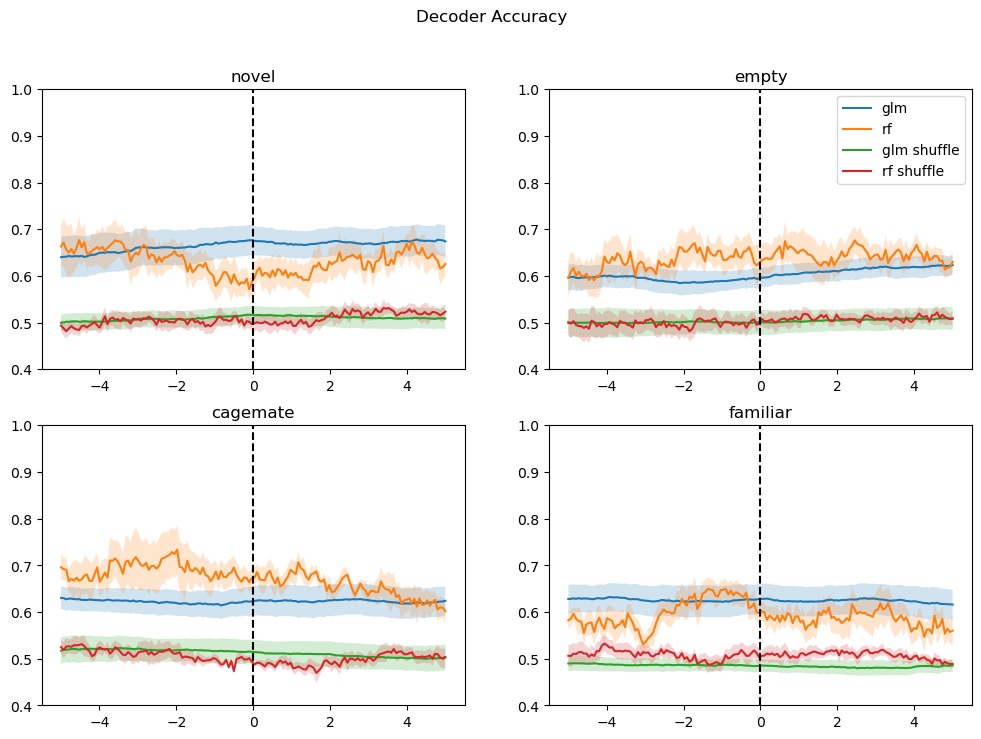

In [16]:
p3_session_shuf_auc, p3_session_shuf_prob = phase3_control.trial_decoder(
    equalize = 5,
    pre_window = 5,
    post_window =5,
    num_fold = 5,
    num_shuffle = 5, 
    no_PCs = 8,
    events = ['novel', 'empty', 'cagemate', 'familiar']
)



# Phase 2

In [29]:
def p2_create_array(boris_df, times, order, min_iti, min_bout, baseline = False):
    familiarization_df = boris_df[(boris_df['Start (s)'] < times[0])]
    baseline_df = boris_df[(boris_df['Start (s)'] > times[1]) & (boris_df['Start (s)'] < times[2])]
    if order[0] == 'familiar':
        recall_df = boris_df[(boris_df['Start (s)'] > times[3]) & (boris_df['Start (s)'] < times[4])]
        exposure1_df = recall_df
    if order[0] == 'cagemate':
        cagemate_df = boris_df[(boris_df['Start (s)'] > times[3]) & (boris_df['Start (s)'] < times[4])]
        exposure1_df = cagemate_df
    if order[0] == 'novel':
        novel_df = boris_df[(boris_df['Start (s)'] > times[3]) & (boris_df['Start (s)'] < times[4])]
        exposure1_df = novel_df
    if order[1] == 'familiar':
        recall_df = boris_df[(boris_df['Start (s)'] > times[5]) & (boris_df['Start (s)'] < times[6])]
        exposure2_df = recall_df 
    if order[1] == 'cagemate':
        cagemate_df = boris_df[(boris_df['Start (s)'] > times[5]) & (boris_df['Start (s)'] < times[6])]
        exposure2_df = cagemate_df 
    if order[1] == 'novel':
        novel_df = boris_df[(boris_df['Start (s)'] > times[5]) & (boris_df['Start (s)'] < times[6])]
        exposure2_df = novel_df
    if order[2] == 'familiar':
        recall_df = boris_df[boris_df['Start (s)'] > times[7]]
        exposure3_df = recall_df 
    if order[2] == 'novel':
        novel_df = boris_df[boris_df['Start (s)'] > times[7]]
        exposure3_df = novel_df
    if order[2] == 'cagemate':
        cagemate_df = boris_df[boris_df['Start (s)'] > times[7]]
        exposure3_df = cagemate_df 

    acquisition_array = boris.get_behavior_bouts(familiarization_df, ['subject'], ['face sniffing', 'anogential sniffing'], min_iti, min_bout)
    recall_array = boris.get_behavior_bouts(recall_df, ['subject'], ['face sniffing', 'anogential sniffing'], min_iti, min_bout)
    cagemate_array = boris.get_behavior_bouts(cagemate_df, ['subject'], ['face sniffing', 'anogential sniffing'], min_iti, min_bout)
    novel_array = boris.get_behavior_bouts(novel_df, ['subject'], ['face sniffing', 'anogential sniffing'], min_iti, min_bout)
    exposure1_array = boris.get_behavior_bouts(exposure1_df, ['subject'], ['face sniffing', 'anogential sniffing'], min_iti, min_bout)
    exposure2_array = boris.get_behavior_bouts(exposure2_df, ['subject'], ['face sniffing', 'anogential sniffing'], min_iti, min_bout)
    exposure3_array = boris.get_behavior_bouts(exposure3_df, ['subject'], ['face sniffing', 'anogential sniffing'], min_iti, min_bout)
    
    if baseline:
        baseline_array = acquisition_array + 600000
        return [acquisition_array, recall_array, cagemate_array, novel_array, baseline_array]
    else:
        return [acquisition_array, recall_array, cagemate_array, novel_array, exposure1_array, exposure2_array, exposure3_array]

def p2_make_assignment(recording, subject, event_arrays, baseline= False):
    if baseline:
        event_dict = {'acquisition': event_arrays[0], 'recall':event_arrays[1], 'cagemate':event_arrays[2], 'novel': event_arrays[3], 'baseline':event_arrays[4]}
    else:
        event_dict = {'acquisition': event_arrays[0], 'recall':event_arrays[1], 'cagemate':event_arrays[2], 'novel': event_arrays[3], 
                      'exposure 0': event_arrays[0], 'exposure 1':event_arrays[4], 'exposure 2': event_arrays[5], 'exposure 3': event_arrays[6]}
    recording.event_dict = event_dict
    recording.subject = subject

def p2_camera_crash(boris_df1, boris_df2, times1, times2, order, media_duration,
                    last_timestamp, min_iti, min_bout, baseline = False):
    array_1 = p2_create_array(boris_df1, times1, order, min_iti, min_bout, baseline)
    array_2 = p2_create_array(boris_df2, times2, order, min_iti, min_bout, baseline)
    diff = (last_timestamp / 20000 * 1000) - (media_duration)
    final_arrays = []
    for i in range(len(array_1)):
        array_2[i] = array_2[i] + diff
        new_array = np.concatenate([array_1[i], array_2[i]])
        final_arrays.append(new_array)
    return final_arrays

def p2_intermediate_shuffle(recording, subject, df,
                            chunk_size, times, min_iti,
                            min_bout, include_acquisition = False):
    if not include_acquisition:
        df = df[(df['Start (s)'] > times[0])]
    bouts = boris.get_behavior_bouts(df, ['subject'], ['face sniffing', 'anogential sniffing'], min_iti, min_bout)
    intermediate_shuffle(recording, subject, bouts, chunk_size, include_acquisition)

def intermediate_shuffle(recording, subject, bouts,
                        chunk_size, include_acquisition = False):
    total_chunks = bouts.shape[0]/chunk_size
    recall = []
    novel = []
    cagemate = []
    if include_acquisition:
        labels = ['recall', 'novel', 'cagemate', 'acquisition']
        acquisition = []
    else:
        labels = ['recall', 'novel', 'cagemate']
    chunk_assignments = np.random.sample(len(labels), size = total_chunks)
    
    for chunk in total_chunks:
        for i in range(chunk_size):
            if chunk_assignments[chunk] == 0:
                recall.append(bouts[chunk*chunk_size + i]) 
            if chunk_assignments[chunk] == 1:
                novel.append(bouts[chunk*chunk_size + i])
            if chunk_assignments[chunk] == 2:
                cagemate.append(bouts[chunk*chunk_size + i])
            if include_acquisition:
                if chunk_assignments[chunk] == 3:
                    acquisition.append(bouts[chunk*chunk_size + i])
    if include_acquisition:
        event_dict = {'acqusition': np.array(acquisition), 
                'recall':np.array(recall), 
                'cageamte':np.array(cagemate),
                'novel': np.array(novel)}
    else:
        event_dict = {'acqusition': np.array(acquisition), 
                'recall':np.array(recall), 
                'cageamte':np.array(cagemate),
                'novel': np.array(novel)}
    recording.event_dict = event_dict
    recording.subject = subject  
       
def p2_camera_crash_intermediate(boris_df1, boris_df2, times1, times2, media_duration,
                                 last_timestamp, min_iti, min_bout, subject, recording,
                                 chunk_size, include_acquisition = False):
    array_1 = p2_create_array(boris_df1, times1, order, min_iti, min_bout)
    array_2 = p2_create_array(boris_df2, times2, order, min_iti, min_bout)
    diff = (last_timestamp / 20000 * 1000) - (media_duration)
    final_arrays = []
    for i in range(len(array_1)):
        array_2[i] = array_2[i] + diff
        new_array = np.concatenate([array_1[i], array_2[i]])
        final_arrays.append(new_array)
    if include_acquisition:
        selected_arrays = final_arrays[:3]
    else:
        selected_arrays = final_arrays[1:3]
    flattened_array = np.concatenate([arr.flatten() for arr in selected_arrays]).reshape(-1, 2)
    sorted_indices = np.argsort(flattened_array[:, 0])
    bouts = flattened_array[sorted_indices]
    intermediate_shuffle(recording, subject, bouts, chunk_size, include_acquisition)
    

IndentationError: expected an indented block after 'else' statement on line 71 (3679795041.py, line 72)

## Collection Creation

In [18]:
phase2_collection = spike.EphysRecordingCollection("D:\\social_ephys_pilot2_cum\\proc\\Phase 2")


20230803_101331_1_merged.rec
20230803_121318_1_merged.rec
20230803_141047_1_merged.rec
20230804_121600_1_merged.rec
20230804_141009_1_merged.rec
20230817_100823_1_merged.rec
20230817_113746_1_merged.rec
20230818_115728_1_merged.rec
20230818_133620_1_merged.rec
Please assign event dictionaries to each recording
as recording.event_dict
event_dict = {event name(str): np.array[[start(ms), stop(ms)]...]
Please assign subjects to each recording as recording.subject


In [19]:

FCN_1_1 = phase2_collection.get_by_name('20230803_101331_1_merged.rec')
CNF_1_1 = phase2_collection.get_by_name('20230817_100823_1_merged.rec')
NFC_1_1 = phase2_collection.get_by_name('20230818_115728_1_merged.rec')

NFC_1_2 = phase2_collection.get_by_name('20230804_141009_1_merged.rec')
FCN_1_2 = phase2_collection.get_by_name('20230817_113746_1_merged.rec')
CNF_1_2 = phase2_collection.get_by_name('20230803_141047_1_merged.rec')
                                        
FCN_1_4 = phase2_collection.get_by_name('20230804_121600_1_merged.rec')
NFC_1_4 = phase2_collection.get_by_name('20230803_121318_1_merged.rec')
CNF_1_4 = phase2_collection.get_by_name('20230818_133620_1_merged.rec')

## Boris Upload

In [20]:
#THE VARIABLE ORDER HAS BEEN SHUFFLED FOR SESSIONS
#ONE VIDEO
#20230817_100823_1.1_CNF
CNF_1_1_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\20230817_100823_1_merged.rec\\20230817_100823_1.1_CNF.xlsx")
times_CNF_1_1 = [630, 633, 1226, 1228, 1526, 1531, 1828, 1832]
order_CNF_1_1 = ['familiar', 'cagemate', 'novel']
CNF_1_1_media_duration = 2131.233 * 1000
CNF_1_1_last_timestamp = CNF_1_1.timestamps_var[-1]



#TWO VIDEOS
#20230803_101331_1_FCN_1
FCN_1_1_1_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\20230803_101331_1_merged.rec\\20230803 101331 1.1.xlsx")
FCN_1_1_2_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\Phase 2\\20230803_101331_1_merged.rec\\20230803 101331 1.2.xlsx")
times_FCN_1_1_1 = [599, 603, 821, 0, 0, 0, 0, 99999999999]
times_FCN_1_1_2 = [0, 0, 374, 377, 671, 677, 970, 976]
order_FCN_1_1 = ['cagemate', 'novel', 'familiar']
FCN_1_1_media_duration = 1290.567 * 1000
FCN_1_1_last_timestamp = FCN_1_1.timestamps_var[-1]



#20230818_115728_1.1_NFC
NFC_1_1_1_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\20230818_115728_1_merged.rec\\20230818 115728 1.1.xlsx")
NFC_1_1_2_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\20230818_115728_1_merged.rec\\20230818 115728 1.2.xlsx")
times_NFC_1_1_1 = [111, 0, 0, 0, 0, 0, 0, 0, 99999999999]
times_NFC_1_1_2 = [527, 533, 1147, 1151, 1446, 1454, 1754, 1762]
order_NFC_1_1 = ['novel', 'familiar', 'cagemate']
NFC_1_1_media_duration = 2059.6 * 1000
NFC_1_1_last_timestamp = NFC_1_1.timestamps_var[-1]




#20230704_141009_1.2_NFC
NFC_1_2_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\20230804_141009_1_merged.rec\\20230804_141009_1.2_2t2bL_NFC.xlsx")
times_NFC_1_2 = [600, 606, 1199, 1202, 1500, 1508, 1800, 1806]
order_NFC_1_2 = ['familiar', 'cagemate', 'novel']
NFC_1_2_meida_duration  = 2106.100 * 1000
NFC_1_2_last_timestamp = NFC_1_2.timestamps_var[-1]




#20230817_113746_1.2_FCN
FCN_1_2_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\20230817_113746_1_merged.rec\\20230817_113746_1.2_2t2bL_FCN.xlsx")
times_FCN_1_2 = [599, 604, 1200, 1203, 1499, 1506, 1811, 1817]
order_FCN_1_2 = ['novel', 'familiar', 'cagemate']
FCN_1_2_media_duration = 2110.67 * 1000
FCN_1_2_last_timestamp = FCN_1_2.timestamps_var[-1]



#20230803_141047_1.2_CNF
CNF_1_2_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\20230803_141047_1_merged.rec\\20230803 _ 141047 _1.2 2t2bL CNF .xlsx")
times_CNF_1_2 = [600, 605, 1200, 1203, 1500, 1506, 1800, 1806]
order_CNF_1_2 = ['cagemate', 'novel', 'familiar']
CNF_1_2_media_duration = 2101.170 * 1000
CNF_1_2_last_timestamp = CNF_1_2.timestamps_var[-1]



#20230804_121600_1.4_FCN
FCN_1_4_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\20230804_121600_1_merged.rec\\20230804_121600_1.4_3t3bL_FCN.xlsx")
times_FCN_1_4 = [600, 607, 1203, 1206, 1499, 1505, 1799, 1807]
order_FCN_1_4 = ['familiar', 'cagemate', 'novel']
FCN_1_4_media_duration = 2101.00 * 100
FCN_1_4_last_timestamp = FCN_1_4.timestamps_var[-1]



#20230818_133620_1.4_CNF
CNF_1_4_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\20230818_133620_1_merged.rec\\20230818_133620_1.4_3t3bL_CNF.xlsx")
times_CNF_1_4 = [599, 605, 1158, 1202, 1497, 1503, 1800, 1806]
order_CNF_1_4 = ['novel', 'familiar', 'cagemate']
CNF_1_4_media_duration = 2100.333 * 1000
CNF_1_4_last_timestamp = CNF_1_4.timestamps_var[-1]




#20230803_121318_1.4_NFC
NFC_1_4_1_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\20230803_121318_1_merged.rec\\20230803 121318 1.1.xlsx")
NFC_1_4_2_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\20230803_121318_1_merged.rec\\20230803 121318 1.2.xlsx")
times_NFC_1_4_1 = [599, 604, 1021, 0, 0, 0, 0, 99999999]
times_NFC_1_4_2 =  [0, 0, 50, 53, 347, 354, 650, 656]
order_NFC_1_4 = ['cagemate', 'novel', 'familiar']
NFC_1_4_media_duration = 951.633 * 1000
NFC_1_4_last_timestamp = NFC_1_4.timestamps_var[-1]




### Full session Shuffle

In [ ]:
CNF_1_1_arrays = p2_create_array(CNF_1_1_boris_df, times_CNF_1_1, order_CNF_1_1, 2, 0.5)
p2_make_assignment(CNF_1_1, '1.1', CNF_1_1_arrays)

FCN_1_1_arrays = p2_camera_crash(FCN_1_1_1_boris_df, FCN_1_1_2_boris_df, times_FCN_1_1_1, times_FCN_1_1_2, order_FCN_1_1, FCN_1_1_media_duration, FCN_1_1_last_timestamp, 2, 0.5)
p2_make_assignment(FCN_1_1, '1.1', FCN_1_1_arrays)

NFC_1_1_arrays = p2_camera_crash(NFC_1_1_1_boris_df, NFC_1_1_2_boris_df, times_NFC_1_1_1, times_NFC_1_1_2, order_NFC_1_1, NFC_1_1_media_duration, NFC_1_1_last_timestamp, 2, 0.5)
p2_make_assignment(NFC_1_1, '1.1', NFC_1_1_arrays)

NFC_1_2_arrays = p2_create_array(NFC_1_2_boris_df, times_NFC_1_2, order_NFC_1_2, 2, 0.5)
p2_make_assignment(NFC_1_2, '1.2', NFC_1_2_arrays)

FCN_1_2_arrays = p2_create_array(FCN_1_2_boris_df, times_FCN_1_2, order_FCN_1_2, 2, 0.5)
p2_make_assignment(FCN_1_2, '1.2', FCN_1_2_arrays)

CNF_1_2_arrays = p2_create_array(CNF_1_2_boris_df, times_CNF_1_2, order_CNF_1_2, 2, 0.5)
p2_make_assignment(CNF_1_2, '1.2', CNF_1_2_arrays)

FCN_1_4_arrays = p2_create_array(FCN_1_4_boris_df, times_FCN_1_4, order_FCN_1_4, 2, 0.5)
p2_make_assignment(FCN_1_4, '1.4', FCN_1_4_arrays)

CNF_1_4_arrays = p2_create_array(CNF_1_4_boris_df, times_CNF_1_4, order_CNF_1_4, 2, 0.5)
p2_make_assignment(CNF_1_4, '1.4', CNF_1_4_arrays)


NFC_1_4_arrays = p2_camera_crash(NFC_1_4_1_boris_df, NFC_1_4_2_boris_df, times_NFC_1_4_1, times_NFC_1_4_2, order_NFC_1_4, NFC_1_4_media_duration, NFC_1_4_last_timestamp, 2, 0.5)
p2_make_assignment(NFC_1_4, '1.4', NFC_1_4_arrays)

### Intermediate Shuffle

In [ ]:
min_iti = 2
min_bout = 0.5
chunk_size = 


p2_intermediate_shuffle(CNF_1_1, '1.1', CNF_1_1_boris_df, chunk_size, times_CNF_1_1, min_iti, min_bout)
p2_intermediate_shuffle(NFC_1_2, '1.2', NFC_1_2_boris_df, chunk_size, times_NFC_1_2, min_iti, min_bout)
p2_intermediate_shuffle(FCN_1_2, '1.2', FCN_1_2_boris_df, chunk_size, times_FCN_1_2, min_iti, min_bout)
p2_intermediate_shuffle(CNF_1_2, '1.2', CNF_1_2_boris_df, chunk_size, times_CNF_1_2, min_iti, min_bout)
p2_intermediate_shuffle(FCN_1_4, '1.4', FCN_1_4_boris_df, chunk_size, times_FCN_1_4, min_iti, min_bout)
p2_intermediate_shuffle(CNF_1_4, '1.4', CNF_1_4_boris_df, chunk_size, times_CNF_1_4, min_iti, min_bout)

p2_camera_crash_intermediate(FCN_1_1_1_boris_df, FCN_1_1_2_boris_df, times_FCN_1_1_1, times_FCN_1_1_2,
                             FCN_1_1_media_duration, FCN_1_1_last_timestamp, min_iti, min_bout, '1.1',
                             FCN_1_1, chunk_size)
p2_camera_crash_intermediate(NFC_1_1_1_boris_df, NFC_1_1_2_boris_df, times_NFC_1_1_1, times_NFC_1_1_2,
                             NFC_1_1_media_duration, NFC_1_1_last_timestamp, min_iti, min_bout, '1.1',
                             NFC_1_1, chunk_size)
p2_camera_crash_intermediate(NFC_1_4_1_boris_df, NFC_1_4_2_boris_df, times_NFC_1_4_1, times_NFC_1_4_2,
                             NFC_1_4_media_duration, NFC_1_4_last_timestamp, min_iti, min_bout, '1.4',
                             NFC_1_4, chunk_size)




## Decoder Run

In [24]:
phase2_analysis = spike.SpikeAnalysis_MultiRecording(phase2_collection, 250, 100, 0.5)

All set to analyze


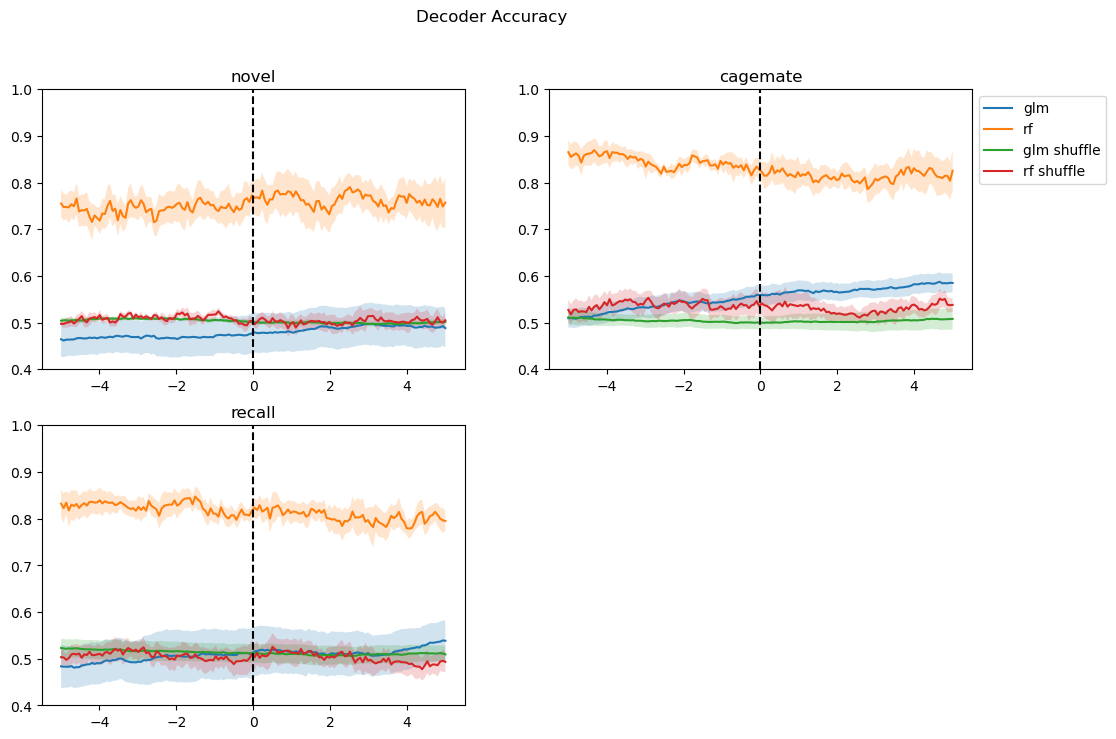

In [26]:
p2_session_control_auc = phase2_analysis.trial_decoder( equalize = 5,
    pre_window = 5,
    post_window =5,
    num_fold = 5,
    num_shuffle = 5, 
    no_PCs = 8,
    events = ['novel', 'cagemate', 'recall']
)